<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Машинное обучение и майнинг данных"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# Занятие 6. Задача восстановления регрессии. Обучение без учителя

## Часть 1. Линейная регрессия и оптимизация

In [1]:
# Python 2 and 3 compatibility
from __future__ import division, print_function
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## 1.1. Первичный анализ данных с Pandas

**Считаем данные по моделям месяца Playboy ('../../data/girls.csv') в объект Pandas DataFrame.**

In [2]:
girls = pd.read_csv('../../data/girls.csv', header=0)

**Посмотрим на первые 5 записей с помощью метода head Pandas DataFrame. Нарисуем гистограмму распределения роста девушек с помощью метода hist Pandas DataFrame.**

In [3]:
girls.head()

,Month,Year,Bust,Waist,Hips,Height,Weight
0,December,1953,91,61,91,165,54
1,March,1954,86,61,89,168,54
2,July,1955,91,61,91,166,52
3,December,1955,91,61,91,166,52
4,July,1956,91,61,86,157,48


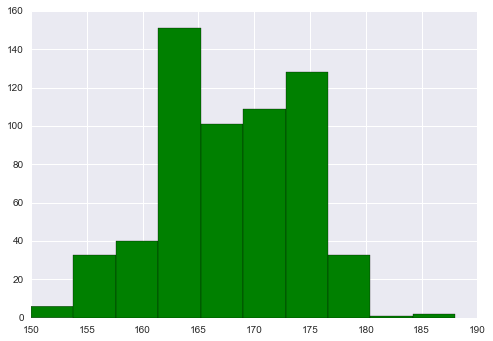

In [4]:
girls['Height'].hist(color='green')

**Построим картинку, на которой будут отображены попарные зависимости признаков 'Bust', 'Waist', 'Hips', 'Height', 'Weight'  друг от друга.**

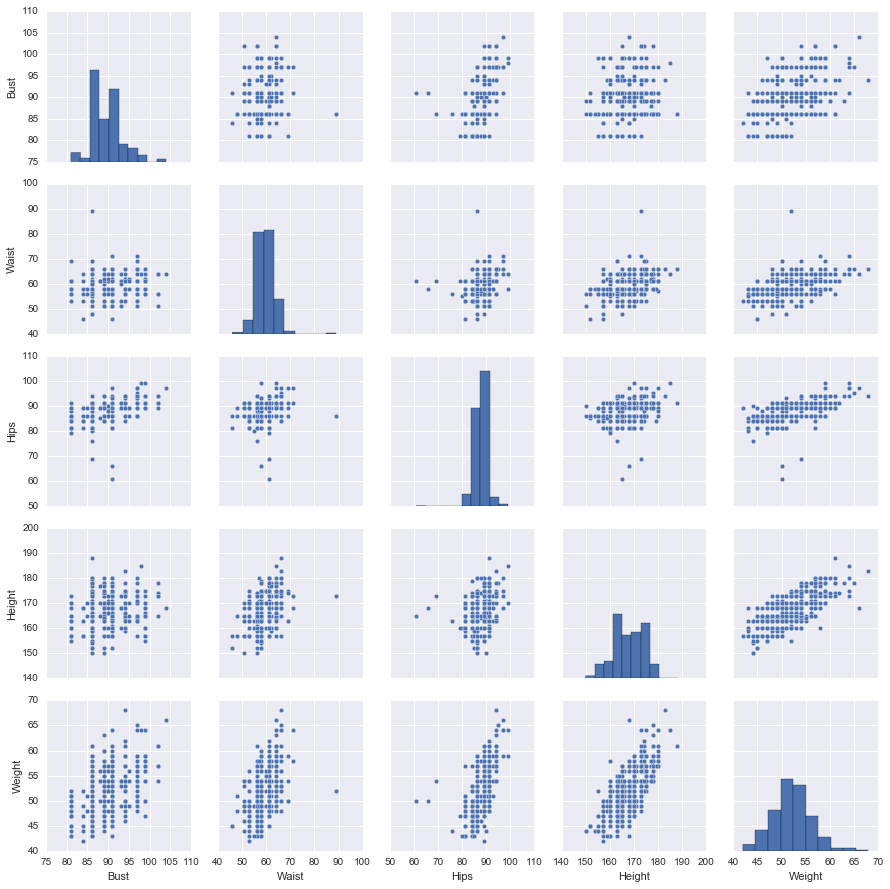

In [5]:
sns.pairplot(girls[['Bust', 'Waist', 'Hips', 'Height', 'Weight']])

**Построим scatter plot зависимости охвата груди от веса, используя метод scatter.**

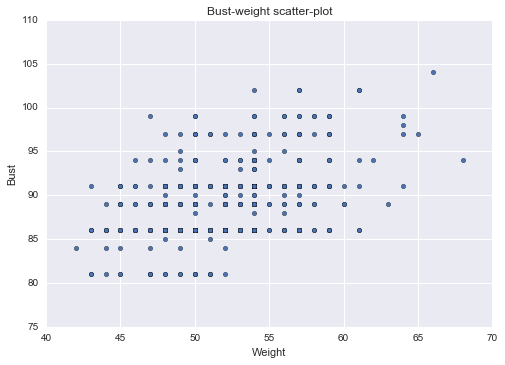

In [6]:
girls.plot(x='Weight', y='Bust', title="Bust-weight scatter-plot", kind='scatter')

## 1.2. Минимизация квадратичной ошибки

**Напишем функцию, которая по двум параметрам $\alpha_0$ и $\alpha_1$ вычисляет квадратичную ошибку приближения зависимости охвата груди $b$ от веса $w$ прямой линией  $b = \alpha_0 + \alpha_1 * w$:
$$error(\alpha_0, \alpha_1) = \sum_{i=1}^n {(b_i - (\alpha_0 + \alpha_1 * w_i))}^2 $$
Здесь $n$ – число наблюдений (девушек) в наборе данных, $b_i$ и $w_i$ – охват груди и вес $i$-ой девушки. **

In [7]:
def sq_error(x_series, y_series, b0, b1):
    errors = (y_series - b0 - b1 * x_series) ** 2
    return errors.sum()

**Проведем две прямые, соответствующие значениям параметров $(\alpha_0, \alpha_1) = (40, 1.1)$ и $(\alpha_0, \alpha_1) = (60, 0.4)$.**

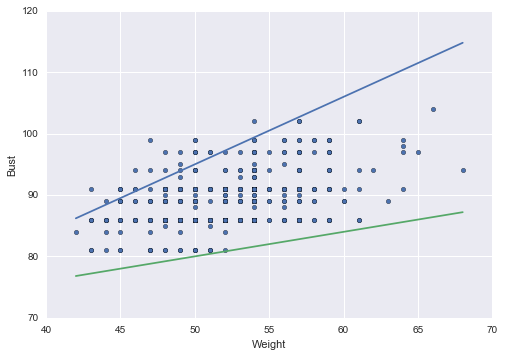

In [8]:
def plot_line(x_series, num_points, params):
    xx = np.linspace(x_series.min(),
                    x_series.max(), num_points)
    yy = np.c_[np.ones(num_points), xx].dot(params)
    plt.plot(xx, yy)
      
girls.plot(x='Weight', y='Bust', kind='scatter')
params1, params2 = np.array([40, 1.1]), np.array([60, 0.4])
plot_line(girls['Weight'], 200, params1)
plot_line(girls['Weight'], 200, params2)

**Построим график зависимости функции ошибки $error(\alpha_0, \alpha_1)$ от параметра $\alpha_1$ при $\alpha_0$ = 50.**

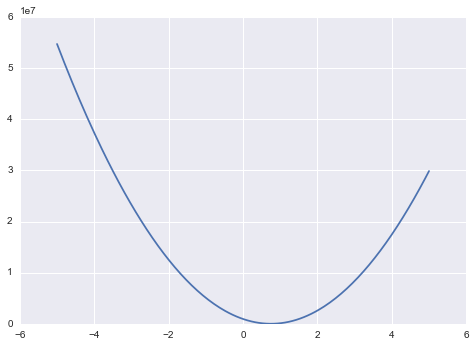

In [9]:
INTERCEPT, NUM_POINTS, ALPHA1_LOWER, ALPHA1_UPPER = 50, 200, -5, 5

alpha1_values = np.linspace(ALPHA1_LOWER, ALPHA1_UPPER, NUM_POINTS)
errors = [sq_error(girls['Weight'], 
                       girls['Bust'], INTERCEPT, alpha1) for alpha1 in alpha1_values]
plt.plot(alpha1_values, errors)

**С помощью метода minimize\_scalar из scipy.optimize найдем минимум функции, определенной в предыдущем пункте для значений параметра  $\alpha_1$ в диапазоне [-5,5].**

In [10]:
from scipy.optimize import minimize_scalar

func = lambda alpha1: sq_error(girls['Weight'], girls['Bust'], INTERCEPT, alpha1)

result = minimize_scalar(func, bounds=[ALPHA1_LOWER, ALPHA1_UPPER], method = 'bounded')

In [11]:
result

     fun: 9207.33769651555
 message: 'Solution found.'
    nfev: 6
  status: 0
 success: True
       x: 0.75110994469325087

In [12]:
optimal_alpha1 = result.x

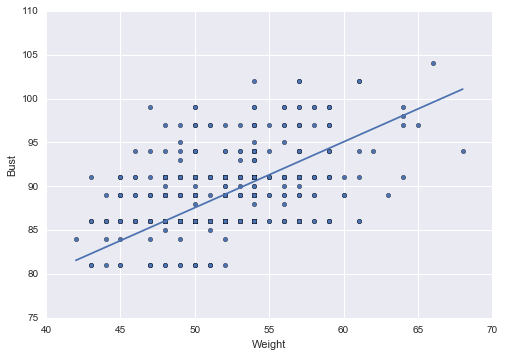

In [13]:
girls.plot(x='Weight', y='Bust', kind='scatter')
plot_line(girls['Weight'], NUM_POINTS, [INTERCEPT, optimal_alpha1])

**Построим 3D-график зависимости функции ошибки $error(\alpha_0, \alpha_1)$ от параметров $\alpha_0$ и $\alpha_1$.**

In [14]:
NUM_POINTS, ALPHA0_LOWER, ALPHA0_UPPER, ALPHA1_LOWER, ALPHA1_UPPER = 200, -100, 100, -5, 5

alpha0_values = np.linspace(ALPHA0_LOWER, ALPHA0_UPPER, NUM_POINTS)
alpha1_values = np.linspace(ALPHA1_LOWER, ALPHA1_UPPER, NUM_POINTS)

In [15]:
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(alpha0_values, alpha1_values)
zz = np.array([sq_error(girls['Weight'], 
                       girls['Bust'], x,y) 
               for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zz.reshape(X.shape)

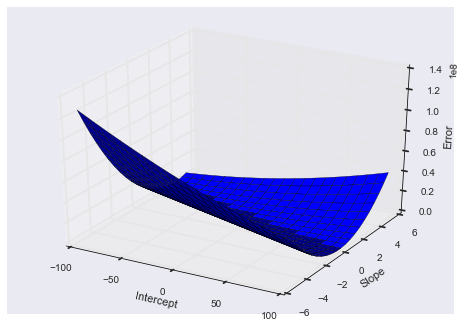

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')

plt.show()

**С помощью метода minimize из scipy.optimize найдем минимум функции $error(\alpha_0, \alpha_1)$ для значений параметра $\alpha_0$ в диапазоне [-100,100] и $\alpha_1$ - в диапазоне [-5, 5]. Начальная точка – ($\alpha_0$, $\alpha_1$) = (0, 0). Используем метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведем прямую, соответствующую найденным оптимальным значениям параметров $\alpha_0$ и $\alpha_1$.**

In [17]:
from scipy.optimize import minimize

error = lambda (alpha0, alpha1): sq_error(girls['Weight'], 
                       girls['Bust'], alpha0, alpha1)
alpha_initial = (0, 0) 
bounds = [(-100, 100), (-5, 5)]
result = minimize(error, alpha_initial, bounds=bounds, method='L-BFGS-B')

In [18]:
result

      fun: 8013.259131313443
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00081855, -0.03528839])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 87
      nit: 6
   status: 0
  success: True
        x: array([ 68.22309974,   0.40387964])

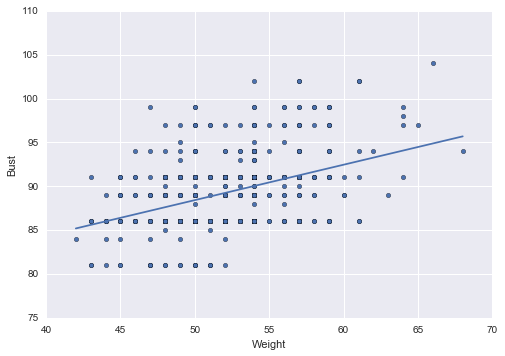

In [19]:
optimal_params = result.x
girls.plot(x='Weight', y='Bust', kind='scatter')
plot_line(girls['Weight'], NUM_POINTS, optimal_params)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(girls['Weight'].values.reshape([girls.shape[0], 1]), 
            girls['Bust'].values.reshape([girls.shape[0], 1]))   # не очень удобно с Series

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
lin_reg.intercept_[0], lin_reg.coef_[0][0] # непонятно, зачем такая вложенность

(68.223072917962995, 0.40388016367979529)

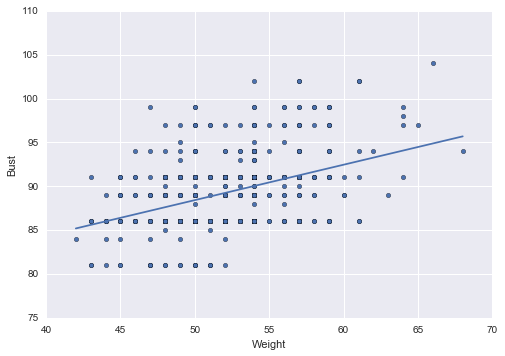

In [23]:
girls.plot(x='Weight', y='Bust', kind='scatter')
plot_line(girls['Weight'], NUM_POINTS,
         [lin_reg.intercept_[0], lin_reg.coef_[0][0]])

**Есть также и реализация, как в языке R.**

In [24]:
from statsmodels.formula.api import ols

In [25]:
result = ols(formula="Bust ~ Weight", data=girls).fit()
result.params

Intercept    68.223073
Weight        0.403880
dtype: float64

In [26]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Bust   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 23 May 2016   Prob (F-statistic):           1.05e-25
Time:                        10:08:19   Log-Likelihood:                -1637.8
No. Observations:                 604   AIC:                             3280.
Df Residuals:                     602   BIC:                             3288.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     68.2231      1.924     35.458      0.000        64.444    72.002
Weight         0.4039      0.037     10.984      0.000         0.332     0.476
==============================================================================
Omnibus:                       25.849   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.994
Skew:                           0.509   Prob(JB):                     8.34e-07
Kurtosis:                       3.272   Cond. No.                         678.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""